In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [7]:
# Load the datasets
movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')

# Preview the datasets
print("Movies DataFrame Head:")
print(movies_df.head())
print("\nCredits DataFrame Head:")
print(credits_df.head())


Movies DataFrame Head:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en 

In [9]:
# Merge the movies and credits datasets on the 'id' column
merged_df = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id')

# Preview the merged dataset
print("Merged DataFrame Head:")
print(merged_df.head())


Merged DataFrame Head:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en 

In [11]:
# Function to count the number of females in cast or crew
def count_females(data, column_name, gender):
    # Convert stringified JSON to a list
    data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x))
    # Count the number of females (gender = 1)
    data[f'num_females_{column_name}'] = data[column_name].apply(lambda x: sum(1 for i in x if i['gender'] == gender))
    return data

# Count the number of females in cast and crew
merged_df = count_females(merged_df, 'cast', 1)
merged_df = count_females(merged_df, 'crew', 1)

# Preview the relevant columns
print("Number of Females in Cast and Crew:")
print(merged_df[['title', 'num_females_cast', 'num_females_crew']].head())


Number of Females in Cast and Crew:


KeyError: "['title'] not in index"

In [13]:
# Check columns in merged_df
print("Columns in merged_df:")
print(merged_df.columns)

# Verify if the new columns were added successfully
print("DataFrame after counting females:")
print(merged_df.head())

# Ensure columns exist before trying to access them
required_columns = ['title', 'num_females_cast', 'num_females_crew']
for col in required_columns:
    if col not in merged_df.columns:
        print(f"Column '{col}' is missing from the DataFrame.")
    else:
        print(f"Column '{col}' is present.")

# Preview the relevant columns if they exist
if all(col in merged_df.columns for col in required_columns):
    print("Number of Females in Cast and Crew:")
    print(merged_df[['title', 'num_females_cast', 'num_females_crew']].head())
else:
    print("Cannot preview data: one or more required columns are missing.")


Columns in merged_df:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew', 'num_females_cast',
       'num_females_crew'],
      dtype='object')
DataFrame after counting females:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995

In [15]:
# Correlation between the number of females in cast/crew and revenue
corr_cast_revenue = merged_df['num_females_cast'].corr(merged_df['revenue'])
corr_crew_revenue = merged_df['num_females_crew'].corr(merged_df['revenue'])

print(f"Correlation between number of females in cast and revenue: {corr_cast_revenue}")
print(f"Correlation between number of females in crew and revenue: {corr_crew_revenue}")


Correlation between number of females in cast and revenue: 0.22265031210033315
Correlation between number of females in crew and revenue: 0.28065890055328374


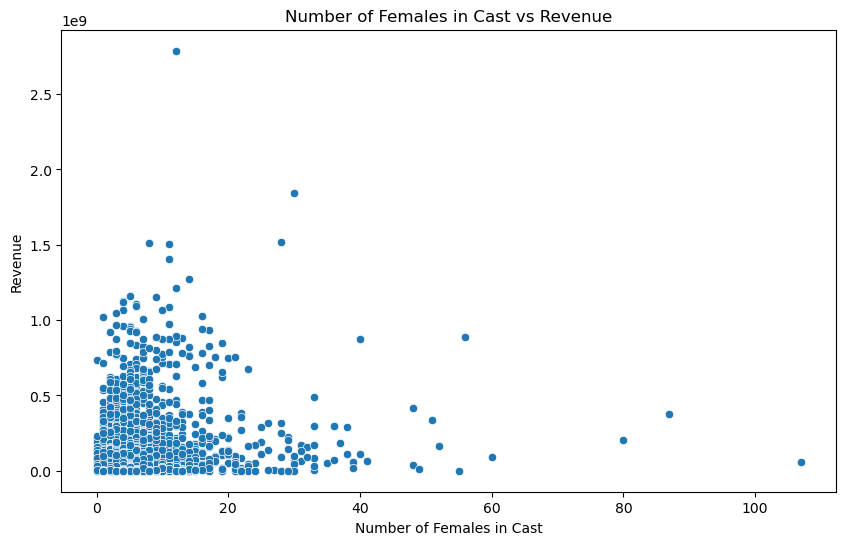

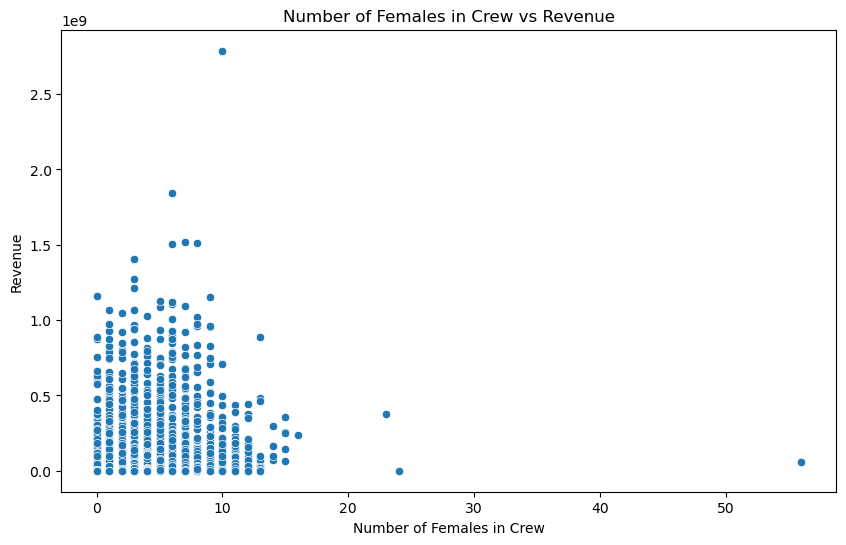

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Number of Females in Cast vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='num_females_cast', y='revenue')
plt.title("Number of Females in Cast vs Revenue")
plt.xlabel("Number of Females in Cast")
plt.ylabel("Revenue")
plt.show()

# Scatter plot: Number of Females in Crew vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='num_females_crew', y='revenue')
plt.title("Number of Females in Crew vs Revenue")
plt.xlabel("Number of Females in Crew")
plt.ylabel("Revenue")
plt.show()


In [19]:
# Save the merged DataFrame with the additional columns for later use
merged_df.to_csv('analyzed_movies_data.csv', index=False)
